In [2]:
import os
import pickle

import numpy as np
import pandas as pd
import arviz as az
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pystan
%load_ext jupyterstan

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
STAN_MODEL_PATH = os.path.join(PROJECT_ROOT_DIR, "stan_models")
STAN_DATA_PATH = os.path.join(PROJECT_ROOT_DIR,'data')

from stan_utils import *

The jupyterstan extension is already loaded. To reload it, use:
  %reload_ext jupyterstan


## 实验一：matern32模型，带噪声误差，10组数据

In [4]:
mater32_model = StanModel_load('matern_cov_error')
data_1 = StanData_load('stan_data_8groups')

Using cached StanModel:matern_cov_error
Using cached StanDATA: stan_data_8groups


In [5]:
experiment_1 = mater32_model.sampling(data_1, iter=10000, chains=4)

In [6]:
experement1_data = az.from_pystan(posterior=experiment_1)
az.to_netcdf(experement1_data, 'experement_1.nc')

'experement_1.nc'

TypeError: traceplot() missing 1 required positional argument: 'dtypes'

## 实验二： matern32模型，带噪声误差，20组数据

In [32]:
data_2 = StanData_load('stan_data_20groups')

Using cached StanDATA: stan_data_20groups


In [33]:
experiment_2 = mater32_model.sampling(data_2, iter=10000, chains=4)

In [34]:
experement2_data = az.from_pystan(posterior=experiment_2)
az.to_netcdf(experement2_data, 'experement_2.nc')

'experement_2.nc'

In [8]:
data = az.from_netcdf('experement_2.nc')
data

Inference data with groups:
	> posterior
	> sample_stats

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7758573d0>,
      dtype=object)

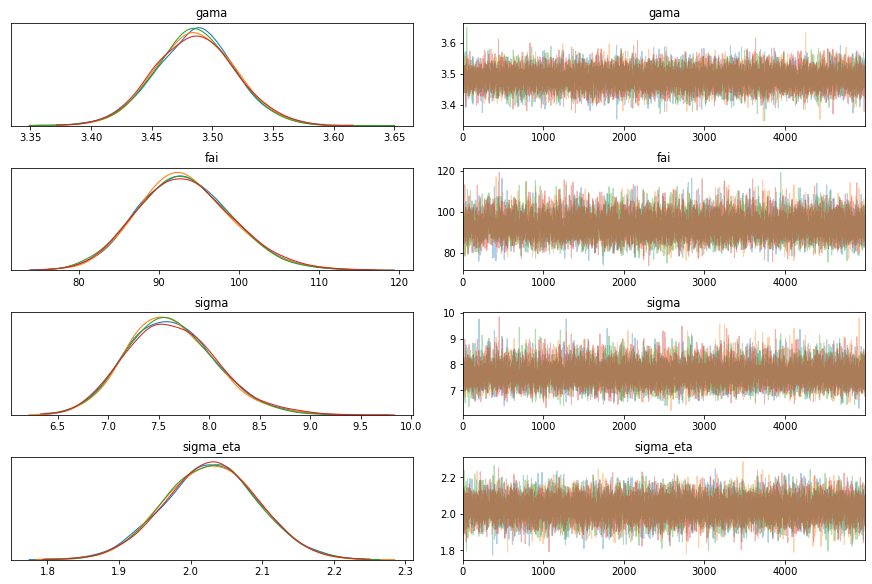

In [35]:
az.plot_trace(experiment_2)

## 实验三： matern32模型，带噪声误差，100组数据

In [37]:
mater32_model = StanModel_load('matern_cov_error')
data_3 = StanData_load('stan_data_100groups')

Using cached StanModel:matern_cov_error
Using cached StanDATA: stan_data_100groups


In [38]:
experiment_3 = mater32_model.sampling(data_3, iter=10000, chains=4)

In [39]:
experement3_data = az.from_pystan(posterior=experiment_3)
az.to_netcdf(experement3_data, 'experement_3.nc')

'experement_3.nc'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe74d688dd0>,
      dtype=object)

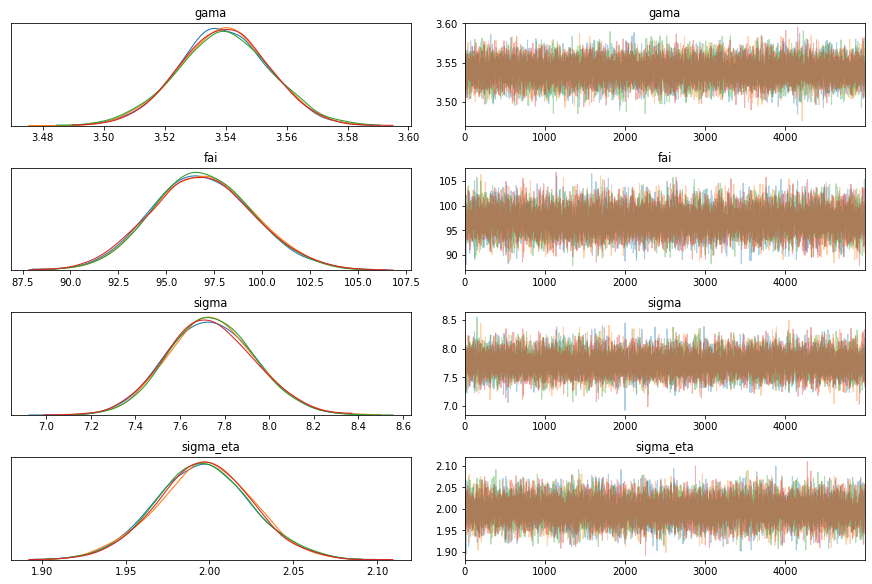

In [40]:
az.plot_trace(experiment_3)

## 实验四： matern32模型，带噪声误差，1000组数据

In [42]:
mater32_model = StanModel_load('matern_cov_error')
data_4 = StanData_load('stan_data_1000groups')

Using cached StanModel:matern_cov_error
Using cached StanDATA: stan_data_1000groups


In [43]:
experiment_4 = mater32_model.sampling(data_4, iter=10000, chains=4)

In [44]:
experement4_data = az.from_pystan(posterior=experiment_4)
experement4_data.to_netcdf('experement_4.nc')

'experement_4.nc'

In [ ]:
az.plot_trace(experiment_4)

## 2的n次方组数据实验

In [ ]:
mater32_model = StanModel_load('matern_cov_error')
for n in range(3,11):
    group_num = 2**n
    stan_data_name = 'stan_data_' + str(group_num) + 'groups'
    data = StanData_load(stan_data_name)
    experiment = mater32_model.sampling(data, iter=10000, chains=4)
    experiment_data = az.from_pystan(posterior=experiment)
    experiment_name = 'experiment' + str(group_num) + '.nc'
    experiment_data.to_netcdf(experiment_name)
    print(experiment_name + ' succeeded!')
    

Using cached StanModel:matern_cov_error
Using cached StanDATA: stan_data_8groups
experiment8.nc succeeded!
Using cached StanDATA: stan_data_16groups
experiment16.nc succeeded!
Using cached StanDATA: stan_data_32groups
experiment32.nc succeeded!
Using cached StanDATA: stan_data_64groups
experiment64.nc succeeded!
Using cached StanDATA: stan_data_128groups


## 重新参数化

In [20]:
mater32_model_reparameter = StanModel_load('matern_cov_error_reparameter')
data_1 = StanData_load('stan_data_10groups')

Using cached StanModel:matern_cov_error_reparameter
Using cached StanDATA: stan_data_10groups


In [21]:
experiment_4 = mater32_model_reparameter.sampling(data_1, iter=10000, chains=4)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe77409d810>,
      dtype=object)

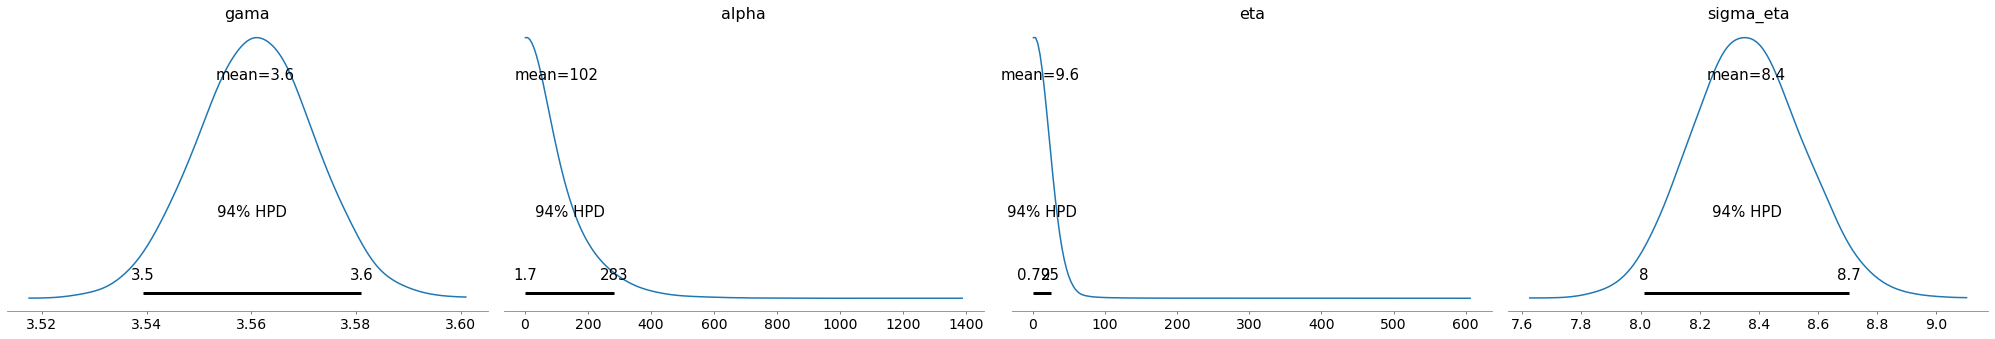

In [24]:
az.plot_posterior(experiment_4,var_names=['gama','alpha','eta','sigma_eta'])